> library dependencies

+ itunes API searcher
    + ```$ pip install pyitunes```

In [1]:
import itunes
import pandas as pd 
import matplotlib.pyplot as plt
import bs4 as bs
import urllib.request
import numpy as np
import seaborn as sns

### this script implements a wrapper for the [iTunes Search Api](https://developer.apple.com/library/archive/documentation/AudioVideo/Conceptual/iTuneSearchAPI/Searching.html)
+ it plots:
    + MIN/MAX values of "Years podcast has published"
    + MIN/MAX values "Minutes of podcast episodes"
    
#### each podcast has a media URL, so the script can be extended for Natural Language Processing of each podcast

In [2]:
# for example
item = itunes.search (query='star wars')
print (item)

[<Feature-Movie>: Star Wars: The Force Awakens, <Feature-Movie>: Star Wars: The Phantom Menace, <Feature-Movie>: Star Wars: The Empire Strikes Back, <Tv-Episode>: R2 Come Home, <Feature-Movie>: Star Wars: Return of the Jedi, <Feature-Movie>: Star Wars: A New Hope, <Feature-Movie>: Star Wars: Attack of the Clones, <Feature-Movie>: Star Wars: Revenge of the Sith, <Podcast>: Rebel Force Radio: Star Wars Podcast, <Tv-Episode>: Bombad Jedi, <Tv-Episode>: An Old Friend, <Tv-Episode>: Weapons Factory, <Tv-Episode>: The Lawless, <Tv-Episode>: Citadel Rescue, <Song>: Star Wars, <Tv-Episode>: Point of No Return, <Tv-Episode>: Bounty, <Tv-Episode>: Ambush, <Tv-Episode>: The Box, <Tv-Episode>: Rising Malevolence, <Tv-Episode>: The Unknown, <Tv-Episode>: Rookies, <Tv-Episode>: Sacrifice, <Tv-Episode>: Defenders of Peace, <Tv-Episode>: Downfall of a Droid, <Tv-Episode>: Conspiracy, <Tv-Episode>: Mystery of the Thousand Moons, <Tv-Episode>: Shadow of Malevolence, <Tv-Episode>: Hostage Crisis]


## This is optimizes to audit podcasts (instead of music albums)
### Un-Comment your query term and Run All Cells
### ⇩


In [3]:
# queryterm = 'cystic fibrosis'
# queryterm = 'infectious disease'
queryterm = 'genetic'
# queryterm = 'covid19'
# queryterm = 'foreclosure'

podsearch = itunes.search(query=queryterm, media='podcast')

In [4]:
for p in podsearch:
    print (p)

<Podcast>: GC Chat: A Genetic Counselling Podcast
<Podcast>: GEN Sounds of Science Podcast
<Podcast>: NSGC Podcast Series
<Podcast>: Genetic Counselors and You
<Podcast>: Genetic revolutions - Audio
<Podcast>: Genetic Engineering
<Podcast>: HC 70A-Genetic Engineering in Medicine, Agriculture - Content
<Podcast>: Atypical dementias: from diagnosis to emerging therapies
<Podcast>: Mad Science: The Genetic  Crossroad With Anna Kavanaugh
<Podcast>: Genetic
<Podcast>: Genetic Jackpot
<Podcast>: GES Center Lectures, NC State University
<Podcast>: Genetic Drift
<Podcast>: Microvibez: Genetic Soundscapes Podcast
<Podcast>: ART 280 Biological and Genetic Art - 2011
<Podcast>: Genetic engineering Podcast
<Podcast>: ART 280 Biological and Genetic Art - 2010
<Podcast>: Genetic Maker Podcast
<Podcast>: Coordinating the Use of Genetic Tests and Related Services (2012-06-19) - Video
<Podcast>: ICGEB-JRC Workshop on "Genome editing applications and beyond"
<Podcast>: Human Genetic Engineering
<Podcast

In [5]:
# each item in that list of Podcast search results looks like this
print (vars(podsearch[0]))

{'id': 1440414147, 'name': 'GC Chat: A Genetic Counselling Podcast', 'url': 'https://podcasts.apple.com/us/podcast/gc-chat-a-genetic-counselling-podcast/id1440414147?uo=4', '_release_date': None, 'artwork': {'30': 'https://is1-ssl.mzstatic.com/image/thumb/Podcasts123/v4/04/b4/42/04b44288-5af7-3e8f-688c-1eb4e7eebad6/mza_4797283620762400973.jpg/30x30bb.jpg', '60': 'https://is1-ssl.mzstatic.com/image/thumb/Podcasts123/v4/04/b4/42/04b44288-5af7-3e8f-688c-1eb4e7eebad6/mza_4797283620762400973.jpg/60x60bb.jpg', '600': 'https://is1-ssl.mzstatic.com/image/thumb/Podcasts123/v4/04/b4/42/04b44288-5af7-3e8f-688c-1eb4e7eebad6/mza_4797283620762400973.jpg/600x600bb.jpg'}, 'json': {'wrapperType': 'track', 'kind': 'podcast', 'collectionId': 1440414147, 'trackId': 1440414147, 'artistName': 'GC Chat, Ellenore Martin, Ashley Crook', 'collectionName': 'GC Chat: A Genetic Counselling Podcast', 'trackName': 'GC Chat: A Genetic Counselling Podcast', 'collectionCensoredName': 'GC Chat: A Genetic Counselling Pod

### ⇪ A little wierd, looks like most of what we want is packed into
### a "JSON" attribute, so...lets' go get it!

- - -

# Lookup 'summary info' about this Podcast Channel

+ name
+ no. of individual episodes / how long been published
+ length posts (minutes)
+ etc.


In [6]:
print (f'There are {len(podsearch)} podcast channels\n')
for channel in podsearch:
    print (f'{channel.json["trackCount"]} podcasts in the "{channel.json["collectionName"]}" channel, (with id = {channel.id})')
    print (f'The last post in this channel was {channel.json["releaseDate"]}, here is iTunes page listing episodes in this channel:')
    print (f'{channel.json["collectionViewUrl"]}\n')

There are 25 podcast channels

16 podcasts in the "GC Chat: A Genetic Counselling Podcast" channel, (with id = 1440414147)
The last post in this channel was 2020-05-17T20:00:00Z, here is iTunes page listing episodes in this channel:
https://podcasts.apple.com/us/podcast/gc-chat-a-genetic-counselling-podcast/id1440414147?uo=4

51 podcasts in the "GEN Sounds of Science Podcast" channel, (with id = 1195688685)
The last post in this channel was 2020-05-26T18:20:00Z, here is iTunes page listing episodes in this channel:
https://podcasts.apple.com/us/podcast/gen-sounds-of-science-podcast/id1195688685?uo=4

14 podcasts in the "NSGC Podcast Series" channel, (with id = 1398417753)
The last post in this channel was 2020-04-28T15:30:00Z, here is iTunes page listing episodes in this channel:
https://podcasts.apple.com/us/podcast/nsgc-podcast-series/id1398417753?uo=4

6 podcasts in the "Genetic Counselors and You" channel, (with id = 1456153684)
The last post in this channel was 2020-04-29T00:51:00

## 'iTunes Collection Preview' page only lists the first few episodes
### Unfortunately for each channel Apple requires you to hit a button to 'Load More', while the podcast publisher's feed (not by Apple) includes ALL podcasts, so looks like we'll be scraping the FeedURL

In [7]:
# "feedUrl" is not consistenly present, so must handle missing Attributes/Keys errors
# definition to write podcast channel info to arrays
def writeKeys(channel):
    channel_number.append(channel.id)
    channel_name.append(channel.json["collectionName"])
    channel_episodecount.append(channel.json["trackCount"])
    channel_itunespreview.append(channel.json["collectionViewUrl"])
    # feedURL is not consistently present
    try:
       channel_feed.append(channel.json["feedUrl"])
    except KeyError as e:
        print (f'{e} does not exist in "{channel.json["collectionName"]}" channel')
        channel_feed.append(None)

In [8]:
# Create arrays for channels dataframe
channel_number = []
channel_name = []
channel_episodecount = []
channel_itunespreview = []
channel_feed = []

# Populate arrays
for channel in podsearch:
    writeKeys(channel)

# create a "Channels" dataframe from arrays
data = {'ID': channel_number,
        'CHANNEL_NAME': channel_name,
        'EPISODE_COUNT': channel_episodecount,
        'ITUNES_PREVIEW_URL': channel_itunespreview,
        'PUBLISHER_FEED': channel_feed
       }
channels = pd.DataFrame(data,columns=['ID','CHANNEL_NAME','EPISODE_COUNT','ITUNES_PREVIEW_URL','PUBLISHER_FEED'])
channels

'feedUrl' does not exist in "Genetic Engineering" channel
'feedUrl' does not exist in "HC 70A-Genetic Engineering in Medicine, Agriculture - Content" channel
'feedUrl' does not exist in "ART 280 Biological and Genetic Art - 2011" channel
'feedUrl' does not exist in "ART 280 Biological and Genetic Art - 2010" channel
'feedUrl' does not exist in "Coordinating the Use of Genetic Tests and Related Services (2012-06-19) - Video" channel
'feedUrl' does not exist in "Coordinating the Use of Genetic Tests and Related Services (2012-06-19) - Audio" channel


,ID,CHANNEL_NAME,EPISODE_COUNT,ITUNES_PREVIEW_URL,PUBLISHER_FEED
0,1440414147,GC Chat: A Genetic Counselling Podcast,16,https://podcasts.apple.com/us/podcast/gc-chat-...,https://gcchatpodcast.libsyn.com/rss
1,1195688685,GEN Sounds of Science Podcast,51,https://podcasts.apple.com/us/podcast/gen-soun...,http://feeds.soundcloud.com/users/soundcloud:u...
2,1398417753,NSGC Podcast Series,14,https://podcasts.apple.com/us/podcast/nsgc-pod...,http://nsgcpodcastseries.libsyn.com/rss
3,1456153684,Genetic Counselors and You,6,https://podcasts.apple.com/us/podcast/genetic-...,https://geneticcounselorsandyou.libsyn.com/rss
4,380229664,Genetic revolutions - Audio,12,https://podcasts.apple.com/us/podcast/genetic-...,http://media-podcast.open.ac.uk/feeds/genetic-...
5,389243026,Genetic Engineering,4,https://podcasts.apple.com/us/podcast/genetic-...,None
6,434141774,"HC 70A-Genetic Engineering in Medicine, Agricu...",34,https://podcasts.apple.com/us/podcast/hc-70a-g...,None
7,1342230726,Atypical dementias: from diagnosis to emerging...,14,https://podcasts.apple.com/us/podcast/atypical...,https://www.icgeb.org/itunesu/AtypicalDementia...
8,631939974,Mad Science: The Genetic Crossroad With Anna ...,28,https://podcasts.apple.com/us/podcast/mad-scie...,http://www.blogtalkradio.com/annakavanaughgene...
9,1502464358,Genetic,1,https://podcasts.apple.com/us/podcast/genetic/...,https://anchor.fm/s/1536dad4/podcast/rss


## Next: create an "Episodes" dataframe
### Constructed from each individual podcast episode in the (non-Apple) publisher's Feed

In [9]:
# query each feed URL and return all the podcast info in each as an object:
def getEpisodeList(url):
    # since we request info from the messy web, let's add some error handling
    try:
        request = urllib.request.Request(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36'})
        source = urllib.request.urlopen(request)
    except urllib.error.HTTPError as e:
        print (f'Failed {e}: {url}')
        return None
    try:
        soup = bs.BeautifulSoup(source,'lxml')
        episodes = soup.find_all('item')
    except AttributeError as e:
        return None
    return episodes

In [10]:
# write episode info to arrays
def writeEpisode(row):
    if (row["PUBLISHER_FEED"]!=None):
        # this is where you extract and append the individual Episode keys
        # repeating the Channel ID & Channel Title for each episode
        r = getEpisodeList(row["PUBLISHER_FEED"])
        for x in r:
            episode_titles.append(x.text)
            channel_ids.append(row["ID"])
            channel_names.append(row["CHANNEL_NAME"])
            try:
                length = x.find("itunes:duration")
                episode_length.append(length.text)
            except:
                episode_length.append(None)
            try:
                published_on = x.pubdate
                episode_published.append(published_on.text)
            except:
                episode_published.append(None)

In [11]:
# Create arrays for episodes dataframe
channel_ids = [] # To match back to channels dataframe
channel_names = [] # Ditto, for legibility
episode_titles = []  # just cuz they bothered to name their podcasts
episode_published = [] # to create a MIN/MAX range of 'dates published'
episode_length = []  # to create a MIN/MAX range of 'episode durations'
episode_mediaurls = []  # to get the podcast an convert to text

# Populate arrays
channels.apply(writeEpisode, axis = 1)

# create an "Episodes" dataframe from arrays
data = {'ID': channel_ids,
        'CHANNEL_NAME': channel_names,
        'EPISODE_TITLE': episode_titles,
        'EPISODE_TIMECODE': episode_length,
        'EPISODE_PUBLISHED': episode_published
       }
episodes = pd.DataFrame(data, columns =['ID','CHANNEL_NAME','EPISODE_TITLE','EPISODE_TIMECODE','EPISODE_PUBLISHED'])
episodes

,ID,CHANNEL_NAME,EPISODE_TITLE,EPISODE_TIMECODE,EPISODE_PUBLISHED
0,1440414147,GC Chat: A Genetic Counselling Podcast,"\nS2E8: Reflection\nReflection\nSun, 17 May 20...",11:12,"Sun, 17 May 2020 20:00:00 +0000"
1,1440414147,GC Chat: A Genetic Counselling Podcast,\nS2E7: The diagnostic odyssey\nThe diagnostic...,27:34,"Sun, 03 May 2020 20:00:00 +0000"
2,1440414147,GC Chat: A Genetic Counselling Podcast,"\nS2E6: Building trust\nBuilding trust\nSun, 1...",38:34,"Sun, 19 Apr 2020 20:00:00 +0000"
3,1440414147,GC Chat: A Genetic Counselling Podcast,\nS2E5: Setting boundaries\nSetting boundaries...,25:50,"Sun, 05 Apr 2020 20:00:00 +0000"
4,1440414147,GC Chat: A Genetic Counselling Podcast,"\nS2E4: Do no harm\nDo no harm\nSun, 01 Dec 20...",21:39,"Sun, 01 Dec 2019 19:00:00 +0000"
...,...,...,...,...,...
195,1496361697,"ICGEB-JRC Workshop on ""Genome editing applicat...",\nG. Grandi - Synthetic biology of bacterial o...,3304,"Tue, 04 Feb 2020 13:45:14 +0100"
196,1511857022,Human Genetic Engineering,Where is the Future of Human Genetic Engineeri...,1022,"Wed, 06 May 2020 02:48:48 +0000"
197,1486313166,selective breeding : genetic engineering,\n\nthe mic was horrible so there was alot of ...,149,"Wed, 30 Oct 2019 18:45:45 GMT"
198,1486410503,Gene Modification Or Genetic Engineering,\n\n\nhttps://anchor.fm/elise-thompson/episode...,146,"Thu, 31 Oct 2019 00:00:15 GMT"


#### Now we need to convert these fields to values we can run MIN/MAX calculations on. 

+ Let's start with:
    + minutes = total minutes of episode
    + years = year episode was published

In [12]:
# Minutes are in TIMECODE, need to be converted to raw minutes
def totalMinutes(row):
    # A lot of the podcasts are missing durations! (..strange...)
    if not (row is None):
        # if duration does not list hours
        if (len(row.split(':')))==2:
            minutes, seconds = row.split(':')
            total_min = int(minutes)
            return total_min
        # if 'hours' are listed
        elif (len(row.split(':')))==3:
            hours, minutes, seconds = row.split(':')
            total_min = int(hours)*60 + int(minutes)
            return total_min
    else:
        return None

In [13]:
# compute total minutes fron the duration timecodes:
episodes["EPISODE_TOTAL_MINUTES"] = episodes["EPISODE_TIMECODE"].apply(totalMinutes)

# Extract the year published from the DATETIME:

episodes['EPISODE_YEAR'] = episodes.EPISODE_PUBLISHED.str.extract(r'(\d\d\d\d)', expand = True)
episodes.EPISODE_YEAR = episodes.EPISODE_YEAR.apply(pd.to_numeric, downcast = 'integer')

In [14]:
# Function to write the MIN / MAX ranges from Episodes dataframe back to the Channel summary dataframe
def defineRanges(dfone,dftwo):
    filtered = dfone[dfone.PUBLISHER_FEED.notnull()]
    dfone["FIRST_YEAR"] = ""
    for f in filtered.ID:
        episode_list = dftwo.loc[dftwo['ID']==f]
        minimum_year = episode_list.EPISODE_YEAR.min()
        maximum_year = episode_list.EPISODE_YEAR.max()
        minimum_length = episode_list.EPISODE_TOTAL_MINUTES.min()
        maximum_length = episode_list.EPISODE_TOTAL_MINUTES.max()
#         print(f'For this channel, first year is {minimum_year}. Last year is {maximum_year}')
#         print(f'And the shortest podcast is {minimum_length} minutes. Longest podcast is {maximum_length} minutes\n')
        dfone.loc[dfone["ID"]==f,"FIRST_YEAR"] = minimum_year
        dfone.loc[dfone["ID"]==f,"LAST_YEAR"] = maximum_year 
        dfone.loc[dfone["ID"]==f,"MIN_PODCAST_LENGTH"] = minimum_length     
        dfone.loc[dfone["ID"]==f,"MAX_PODCAST_LENGTH"] = maximum_length        

In [15]:
# Write Publish / Duration ranges back to Channel dataframe
defineRanges(channels, episodes)

# Drop the empty FeedURLs which (will have no data)
channels.dropna(subset = ["PUBLISHER_FEED"], inplace = True)
channels.reset_index(drop=True, inplace=True)
channels

,ID,CHANNEL_NAME,EPISODE_COUNT,ITUNES_PREVIEW_URL,PUBLISHER_FEED,FIRST_YEAR,LAST_YEAR,MIN_PODCAST_LENGTH,MAX_PODCAST_LENGTH
0,1440414147,GC Chat: A Genetic Counselling Podcast,16,https://podcasts.apple.com/us/podcast/gc-chat-...,https://gcchatpodcast.libsyn.com/rss,2018,2020.0,1.0,38.0
1,1195688685,GEN Sounds of Science Podcast,51,https://podcasts.apple.com/us/podcast/gen-soun...,http://feeds.soundcloud.com/users/soundcloud:u...,2017,2020.0,2.0,31.0
2,1398417753,NSGC Podcast Series,14,https://podcasts.apple.com/us/podcast/nsgc-pod...,http://nsgcpodcastseries.libsyn.com/rss,2018,2020.0,13.0,54.0
3,1456153684,Genetic Counselors and You,6,https://podcasts.apple.com/us/podcast/genetic-...,https://geneticcounselorsandyou.libsyn.com/rss,2019,2020.0,16.0,31.0
4,380229664,Genetic revolutions - Audio,12,https://podcasts.apple.com/us/podcast/genetic-...,http://media-podcast.open.ac.uk/feeds/genetic-...,2010,2010.0,1.0,5.0
5,1342230726,Atypical dementias: from diagnosis to emerging...,14,https://podcasts.apple.com/us/podcast/atypical...,https://www.icgeb.org/itunesu/AtypicalDementia...,2018,2018.0,21.0,32.0
6,631939974,Mad Science: The Genetic Crossroad With Anna ...,28,https://podcasts.apple.com/us/podcast/mad-scie...,http://www.blogtalkradio.com/annakavanaughgene...,2013,2015.0,26.0,36.0
7,1502464358,Genetic,1,https://podcasts.apple.com/us/podcast/genetic/...,https://anchor.fm/s/1536dad4/podcast/rss,2020,2020.0,NaN,NaN
8,1355326946,Genetic Jackpot,11,https://podcasts.apple.com/us/podcast/genetic-...,http://feeds.soundcloud.com/users/soundcloud:u...,2018,2018.0,6.0,37.0
9,1495093080,"GES Center Lectures, NC State University",12,https://podcasts.apple.com/us/podcast/ges-cent...,https://pinecast.com/feed/ges-center-lectures-...,2020,2020.0,52.0,85.0


## Now: Let's plot that
### We'll create a 'Range Plot' to show these two MIN/MAX ranges

In [16]:
# Lot of NaN wierdness in this list of durations...because so many missing 'Durations'
# Let's create an index of the absolute ranges for DURATIONS and YEARS, with no missing values:
MinutesIndex = pd.Index(episodes.EPISODE_TOTAL_MINUTES[np.logical_not(np.isnan(episodes.EPISODE_TOTAL_MINUTES))])

#less funkiness with years
YearsIndex = pd.Index(episodes.EPISODE_YEAR[np.logical_not(np.isnan(episodes.EPISODE_YEAR))])
YearsIndex

Int64Index([2020, 2020, 2020, 2020, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2019, 2019, 2019],
           dtype='int64', name='EPISODE_YEAR', length=200)

In [17]:
#Create an Index of the years, to plot against
minutesaudit = pd.DataFrame(index=set(MinutesIndex))
yearsaudit = pd.DataFrame(index=set(YearsIndex)).sort_index(ascending = True)
minutesaudit.index.name = "MINUTES_RANGE"
yearsaudit.index.name = "YEARS_RANGE"
minutesaudit

""
MINUTES_RANGE
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


In [18]:
yearsaudit.index = yearsaudit.index.astype(int) # use astype to strip out decimal points

In [19]:
# Write the ranges to the "Years Published" dataframe

for i in range (channels.shape[0]):
    print(i+1)
    print (channels.loc[i].CHANNEL_NAME)
    print (int(channels.loc[i].FIRST_YEAR))
    print (int(channels.loc[i].LAST_YEAR))
    yearsaudit[channels.loc[i].CHANNEL_NAME] = yearsaudit.index.to_series().apply(lambda x: i+1 if x >= int(channels.loc[i].FIRST_YEAR) and x <= int(channels.loc[i].LAST_YEAR) else np.NaN)

1
GC Chat: A Genetic Counselling Podcast
2018
2020
2
GEN Sounds of Science Podcast
2017
2020
3
NSGC Podcast Series
2018
2020
4
Genetic Counselors and You
2019
2020
5
Genetic revolutions - Audio
2010
2010
6
Atypical dementias: from diagnosis to emerging therapies
2018
2018
7
Mad Science: The Genetic  Crossroad With Anna Kavanaugh
2013
2015
8
Genetic
2020
2020
9
Genetic Jackpot
2018
2018
10
GES Center Lectures, NC State University
2020
2020
11
Genetic Drift
2020
2020
12
Microvibez: Genetic Soundscapes Podcast
2011
2013
13
Genetic engineering Podcast
2019
2019
14
Genetic Maker Podcast
2019
2020
15
ICGEB-JRC Workshop on "Genome editing applications and beyond"
2020
2020
16
Human Genetic Engineering
2020
2020
17
selective breeding : genetic engineering
2019
2019
18
Gene Modification Or Genetic Engineering
2019
2019
19
The Genetic Podcast With Pato And Chas
2019
2019


In [20]:
# Write the ranges to the "Length of Podcasts" dataframe

for i in range (channels.shape[0]):
#     print(i+1)
#     print (channels.loc[i].CHANNEL_NAME)
#     print (int(channels.loc[i].FIRST_YEAR))
#     print (int(channels.loc[i].LAST_YEAR))
    if (channels.loc[i].MIN_PODCAST_LENGTH != None):
        minutesaudit[channels.loc[i].CHANNEL_NAME] = minutesaudit.index.to_series().apply(lambda x: i+1 if x >= channels.loc[i].MIN_PODCAST_LENGTH and x <= channels.loc[i].MAX_PODCAST_LENGTH else np.NaN)
    else:
        pass


In [21]:
ticks = []
names = []
for i in range (channels.shape[0]+1):
    ticks.append(i+1)
for i in range (channels.shape[0]):    
    names.append(channels.loc[i].CHANNEL_NAME)

In [22]:
yearsaudit

,GC Chat: A Genetic Counselling Podcast,GEN Sounds of Science Podcast,NSGC Podcast Series,Genetic Counselors and You,Genetic revolutions - Audio,Atypical dementias: from diagnosis to emerging therapies,Mad Science: The Genetic Crossroad With Anna Kavanaugh,Genetic,Genetic Jackpot,"GES Center Lectures, NC State University",Genetic Drift,Microvibez: Genetic Soundscapes Podcast,Genetic engineering Podcast,Genetic Maker Podcast,"ICGEB-JRC Workshop on ""Genome editing applications and beyond""",Human Genetic Engineering,selective breeding : genetic engineering,Gene Modification Or Genetic Engineering,The Genetic Podcast With Pato And Chas
YEARS_RANGE,,,,,,,,,,,,,,,,,,,
2010,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,1.0,2.0,3.0,NaN,NaN,6.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,1.0,2.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,14.0,NaN,NaN,17.0,18.0,19.0


In [23]:
# Setup some Seaborn styling
sns.set(style="dark", rc={"lines.linewidth": 8.0})
sns.set_context("talk", rc={"font.size":30,"axes.titlesize":8,"axes.labelsize":30,"lines.linewidth": 8.0})

Text(0.5, 0, '')

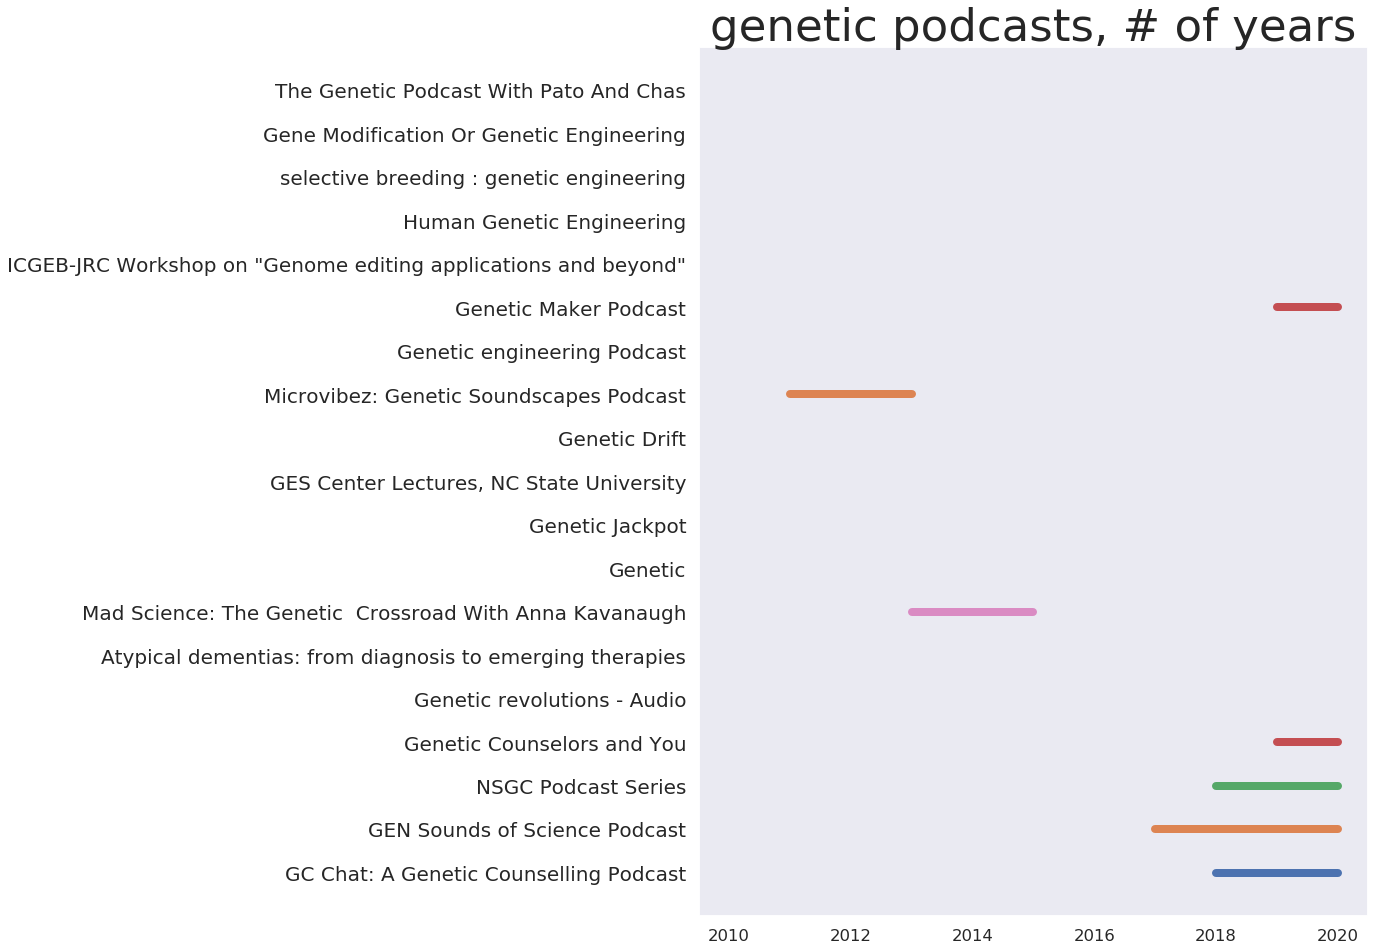

In [24]:
# plot Channel Summary
p = yearsaudit.plot.line(ylim=[0, 4], figsize = (12, 16), legend=False)
p.axes.set_title(f'{queryterm} podcasts, # of years',fontsize = 45)
p.set_yticks(ticks)
p.set_yticklabels(names,fontsize=20)
p.set_xlabel('')

In [25]:
minutesaudit

,GC Chat: A Genetic Counselling Podcast,GEN Sounds of Science Podcast,NSGC Podcast Series,Genetic Counselors and You,Genetic revolutions - Audio,Atypical dementias: from diagnosis to emerging therapies,Mad Science: The Genetic Crossroad With Anna Kavanaugh,Genetic,Genetic Jackpot,"GES Center Lectures, NC State University",Genetic Drift,Microvibez: Genetic Soundscapes Podcast,Genetic engineering Podcast,Genetic Maker Podcast,"ICGEB-JRC Workshop on ""Genome editing applications and beyond""",Human Genetic Engineering,selective breeding : genetic engineering,Gene Modification Or Genetic Engineering,The Genetic Podcast With Pato And Chas
MINUTES_RANGE,,,,,,,,,,,,,,,,,,,
1.0,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,1.0,2.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,1.0,2.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,1.0,2.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,1.0,2.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, '')

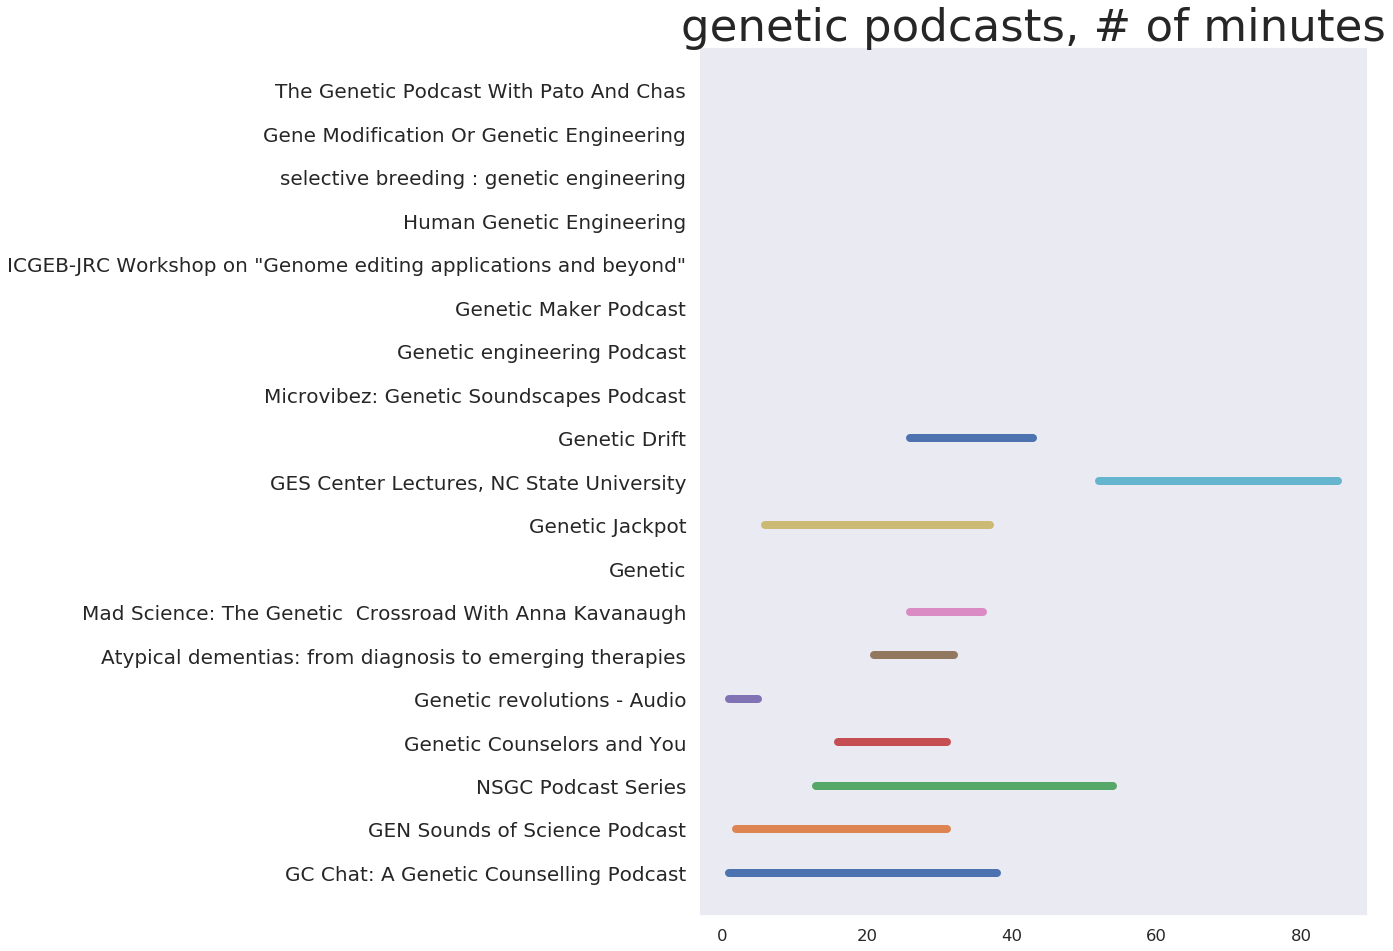

In [26]:
# plot Episode summary
q = minutesaudit.plot.line(ylim=[0, 4], figsize = (12, 16), legend=False)
q.axes.set_title(f'{queryterm} podcasts, # of minutes',fontsize = 45)
q.set_yticks(ticks)
q.set_yticklabels(names,fontsize=20)
q.set_xlabel('')